INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


 Write image to: output.png


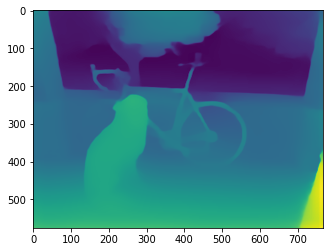

In [1]:
import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

url, filename = ("https://github.com/intel-isl/MiDaS/releases/download/v2/dog.jpg", "dog.jpg")
urllib.request.urlretrieve(url, filename)

# the runtime initialization will not allocate all memory on the device to avoid out of GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  
  tf.config.experimental.set_virtual_device_configuration(gpu,
                                                          [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=4000)])

# input
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) / 255.0

img_resized = tf.image.resize(img, [384,384], method='bicubic', preserve_aspect_ratio=False)
img_resized = tf.transpose(img_resized, [2, 0, 1])
img_input = img_resized.numpy()
reshape_img = img_input.reshape(1,3,384,384)
tensor = tf.convert_to_tensor(reshape_img, dtype=tf.float32)

# load model
module = hub.load("https://tfhub.dev/intel/midas/v2/2", tags=['serve'])
output = module.signatures['serving_default'](tensor)
prediction = output['default'].numpy()
prediction = prediction.reshape(384, 384)


prediction = cv2.resize(prediction, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
print(" Write image to: output.png")
depth_min = prediction.min()
depth_max = prediction.max()
img_out = (255 * (prediction - depth_min) / (depth_max - depth_min)).astype("uint8")

cv2.imwrite("output.png", img_out)
plt.imshow(img_out)
# plt.show()

